<a href="https://colab.research.google.com/github/linnilinnil/Educational-Role-play-Game-Avatar-Inferences/blob/main/PlayForward%20avatar-playing%20exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Challenge description
Dataset: gain insights from the player data from the Play2Prevent lab's PlayForward: Elm City game
https://docs.google.com/presentation/d/1iYCEFOiZKJ8BKYyfmbQPLCyU9cPK1cKkULuJ-YLlNr0/edit?usp=sharing 


##Project description

  
**Thesis questions**  
To what extent do playing experiences differ for students 
with different avatars?
How do we characterize playing experience and categorize
students based on it?  

**Tools**  
R: data clean up & factor building
Panda: data combination & manipulation 
Sklearn: data clustering & analysis
Matplotlib/Plotly: 3D visualization  

**Approach**  
Distill to related variables:
Avatars types (age, gender, ethnicity)
Game experience (stack progress/session, total playtime, average skill points/session)
Categorize players with K-Means clustering on normalized data 
Examine game experiences among different avatars by:
Coloring based on avatar types 
Performing ANOVA test to compare group means


In [ ]:
datapath = '/content/drive/MyDrive/Datafest/'

##dependencies

In [4]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D as ax
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from plotly.graph_objs import *

##import and sort by id save playerid

data cleaning is done in R, where we distill

In [ ]:
logdf = pd.read_csv(os.path.join(datapath,'log_new.csv'))

NameError: ignored

In [ ]:
logdf.head()

,row_id,player_id,wave,session,event_id,event_description,event_category,event_time_dbl,event_duration,stack_id,stack_title,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,minigame_id,minigame_level,avatar_age,avatar_gender
0,1,6427001,"3561 (T,TH) Spring 2013",Session 1,600,Player selects age,Avatar Creation,198,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN
1,2,6427001,"3561 (T,TH) Spring 2013",Session 1,601,Player selects gender,Avatar Creation,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
2,3,6427001,"3561 (T,TH) Spring 2013",Session 1,602,Player commits to age and gender,Avatar Creation,205,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Male
3,4,6427001,"3561 (T,TH) Spring 2013",Session 1,603,Player selects avatar,Avatar Creation,210,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6427001,"3561 (T,TH) Spring 2013",Session 1,604,Player commits to avatar and name,Avatar Creation,252,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
logdf.shape

(2106597, 20)

In [ ]:
logdf.sort_values(by="row_id")

,row_id,player_id,wave,session,event_id,event_description,event_category,event_time_dbl,event_duration,stack_id,stack_title,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,minigame_id,minigame_level,avatar_age,avatar_gender
0,1,6427001,"3561 (T,TH) Spring 2013",Session 1,600,Player selects age,Avatar Creation,198,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN
1,2,6427001,"3561 (T,TH) Spring 2013",Session 1,601,Player selects gender,Avatar Creation,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
2,3,6427001,"3561 (T,TH) Spring 2013",Session 1,602,Player commits to age and gender,Avatar Creation,205,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Male
3,4,6427001,"3561 (T,TH) Spring 2013",Session 1,603,Player selects avatar,Avatar Creation,210,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6427001,"3561 (T,TH) Spring 2013",Session 1,604,Player commits to avatar and name,Avatar Creation,252,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106592,2106593,65670032,Single wave,Session 10,706,Player pans epilogue,Epilogue,5761,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106593,2106594,65670032,Single wave,Session 10,705,Player closes Epilogue Item,Epilogue,5765,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106594,2106595,65670032,Single wave,Session 10,1,Player ends session,General,5767,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106595,2106596,65670032,Single wave,Session 10,706,Player pans epilogue,Epilogue,5767,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
logdf = logdf[logdf["session"]!="Session Control Group"]

In [ ]:
playerid = logdf.drop_duplicates(subset = "player_id",keep="last")

In [ ]:
playerid = playerid[["player_id"]].to_numpy()

In [ ]:
playerid

array([[ 6427001],
       [ 6427004],
       [ 6427006],
       [ 6427008],
       [ 6427010],
       [ 6427011],
       [ 6427012],
       [ 6427013],
       [ 6427014],
       [ 6427015],
       [ 6427016],
       [ 6427017],
       [ 6427018],
       [ 6427019],
       [ 6427021],
       [ 6427022],
       [ 6427023],
       [ 6427024],
       [ 6427025],
       [ 6427026],
       [ 6427027],
       [ 6427028],
       [ 6427029],
       [ 6427030],
       [ 6427031],
       [ 6427032],
       [ 6427033],
       [ 6427034],
       [ 6427035],
       [ 6427036],
       [ 6427037],
       [ 6427038],
       [ 6427039],
       [ 6427040],
       [ 6427041],
       [ 6427042],
       [ 6427043],
       [ 6429001],
       [ 6429002],
       [ 6429003],
       [ 6430001],
       [ 6430002],
       [ 6430003],
       [ 6430004],
       [ 6430006],
       [ 6430007],
       [ 6430008],
       [ 6430009],
       [ 6486001],
       [ 6486002],
       [ 6486003],
       [ 6486004],
       [ 648

##Clean avatar gender in gender

In [ ]:
genderdf = logdf[logdf['avatar_gender'].notna()]
genderdf = genderdf.drop_duplicates(subset='player_id', keep="last")

In [ ]:
gender = genderdf[['avatar_gender']].to_numpy()

In [ ]:
gender.shape

(163, 1)

##Clean avatar age in age



In [ ]:
agedf = logdf[logdf['avatar_age'].notna()]
agedf = agedf.drop_duplicates(subset='player_id', keep="last")

In [ ]:
age = agedf[['avatar_age']].to_numpy()

In [ ]:
age

array([[13.],
       [13.],
       [13.],
       [13.],
       [13.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [13.],
       [14.],
       [13.],
       [14.],
       [14.],
       [14.],
       [13.],
       [13.],
       [12.],
       [12.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [13.],
       [11.],
       [11.],
       [12.],
       [11.],
       [12.],
       [13.],
       [11.],
       [14.],
       [12.],
       [12.],
       [14.],
       [12.],
       [12.],
       [13.],
       [12.],
       [11.],
       [12.],
       [14.],
       [11.],
       [13.],
       [14.],
       [14.],
       [12.],
       [12.],
       [13.],
       [14.],
       [12.],
       [14.],
       [14.],
       [14.],
       [11.],
       [12.],
       [13.],
       [14.],
       [13.],
       [13.],
       [13.],
       [12.],
       [13.],
       [12.],
       [14.],
       [14.],
       [14.],
      

##Clean avatar id in id


In [ ]:
logiddf = pd.read_csv(os.path.join(datapath,'log_halfClean.csv'))

In [ ]:
logiddf.sort_values(by="row_id")

,row_id,player_id,stack_id,minigame_id,minigame_level_id,avatar_age,avatar_gender_select,avatar_id
0,1,6427001,NaN,NaN,NaN,13.0,NaN,NaN
1,2,6427001,NaN,NaN,NaN,NaN,0.0,NaN
2,3,6427001,NaN,NaN,NaN,13.0,NaN,NaN
3,4,6427001,NaN,NaN,NaN,NaN,NaN,2.0
4,5,6427001,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
2106592,2106593,65670032,NaN,NaN,NaN,NaN,NaN,NaN
2106593,2106594,65670032,NaN,NaN,NaN,NaN,NaN,NaN
2106594,2106595,65670032,NaN,NaN,NaN,NaN,NaN,NaN
2106595,2106596,65670032,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
iddf = logiddf[logiddf['avatar_id'].notna()]

In [ ]:
iddf = iddf[iddf["player_id"]!=6427002]
iddf = iddf[iddf["player_id"]!=6427005]
iddf = iddf[iddf["player_id"]!=6427007]

In [ ]:
id = (iddf.drop_duplicates(subset='player_id', keep="last"))[["avatar_id"]].to_numpy()

In [ ]:
id.shape

(163, 1)

##clean stack gone thru/session in stackpersess


In [ ]:
stackdf = logdf[logdf['stack_id'].notna()]
stackdf = stackdf.drop_duplicates(subset='player_id', keep="last")

In [ ]:
stacknum = stackdf[['stack_id']]%12

In [ ]:
stacknum = stacknum["stack_id"].tolist()

In [ ]:
stacknum

[11.0,
 11.0,
 11.0,
 5.0,
 0.0,
 11.0,
 11.0,
 6.0,
 3.0,
 5.0,
 10.0,
 8.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 10.0,
 5.0,
 11.0,
 6.0,
 7.0,
 1.0,
 4.0,
 10.0,
 0.0,
 11.0,
 1.0,
 8.0,
 7.0,
 6.0,
 6.0,
 6.0,
 11.0,
 6.0,
 9.0,
 1.0,
 1.0,
 2.0,
 7.0,
 11.0,
 11.0,
 11.0,
 0.0,
 6.0,
 8.0,
 0.0,
 5.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 10.0,
 11.0,
 11.0,
 11.0,
 5.0,
 2.0,
 11.0,
 8.0,
 11.0,
 3.0,
 8.0,
 4.0,
 11.0,
 8.0,
 11.0,
 0.0,
 11.0,
 11.0,
 6.0,
 10.0,
 10.0,
 11.0,
 0.0,
 11.0,
 11.0,
 2.0,
 11.0,
 6.0,
 10.0,
 11.0,
 4.0,
 11.0,
 11.0,
 10.0,
 11.0,
 11.0,
 1.0,
 6.0,
 5.0,
 11.0,
 0.0,
 11.0,
 4.0,
 9.0,
 11.0,
 5.0,
 8.0,
 0.0,
 10.0,
 5.0,
 7.0,
 7.0,
 8.0,
 6.0,
 4.0,
 11.0,
 1.0,
 6.0,
 3.0,
 11.0,
 6.0,
 6.0,
 8.0,
 5.0,
 7.0,
 2.0,
 6.0,
 11.0,
 8.0,
 2.0,
 8.0,
 11.0,
 8.0,
 1.0,
 2.0,
 11.0,
 10.0,
 10.0,
 6.0,
 7.0,
 6.0,
 11.0,
 0.0,
 6.0,
 11.0,
 11.0,
 9.0,
 11.0,
 11.0,
 4.0,
 6.0,
 0.0,
 11.0,
 6.0,
 9.0,
 11.0,
 11.0,
 10.0,
 11.0,
 9.0,
 11.0,
 4.0,
 

In [ ]:
sessiondf = logdf[logdf['session'].notna()]

In [ ]:
sessiondf = sessiondf.drop_duplicates(subset="player_id",keep='last')

In [ ]:
sessionnum = sessiondf[["session"]].to_numpy()

In [ ]:
sessnum = []
for s in sessionnum:
    s = str(s)
    s = s[len(s)-5:]
    snum = ''
    for i in s:
      if i.isdigit():
              snum+=i
    print(snum)
    sessnum.append(snum)

11
9
10
7
2
7
7
9
3
5
9
11
11
8
9
11
10
12
10
8
10
9
3
11
8
1
11
9
11
11
9
10
5
11
11
11
8
4
3
7
9
10
8
8
8
9
2
9
8
7
10
10
7
8
12
13
8
6
5
11
10
11
12
8
4
12
11
10
2
10
11
8
11
12
12
1
9
10
3
10
7
10
11
6
10
11
11
9
9
11
11
11
12
11
6
12
7
8
5
10
12
13
5
10
11
13
13
11
10
6
7
11
11
16
18
9
16
12
5
10
12
6
6
6
6
7
2
3
10
11
8
7
8
11
11
2
8
11
10
10
10
12
4
10
1
11
9
8
8
9
7
10
8
9
9
3
8
11
11
12
11
9
10


In [ ]:
sessnum

['11',
 '9',
 '10',
 '7',
 '2',
 '7',
 '7',
 '9',
 '3',
 '5',
 '9',
 '11',
 '11',
 '8',
 '9',
 '11',
 '10',
 '12',
 '10',
 '8',
 '10',
 '9',
 '3',
 '11',
 '8',
 '1',
 '11',
 '9',
 '11',
 '11',
 '9',
 '10',
 '5',
 '11',
 '11',
 '11',
 '8',
 '4',
 '3',
 '7',
 '9',
 '10',
 '8',
 '8',
 '8',
 '9',
 '2',
 '9',
 '8',
 '7',
 '10',
 '10',
 '7',
 '8',
 '12',
 '13',
 '8',
 '6',
 '5',
 '11',
 '10',
 '11',
 '12',
 '8',
 '4',
 '12',
 '11',
 '10',
 '2',
 '10',
 '11',
 '8',
 '11',
 '12',
 '12',
 '1',
 '9',
 '10',
 '3',
 '10',
 '7',
 '10',
 '11',
 '6',
 '10',
 '11',
 '11',
 '9',
 '9',
 '11',
 '11',
 '11',
 '12',
 '11',
 '6',
 '12',
 '7',
 '8',
 '5',
 '10',
 '12',
 '13',
 '5',
 '10',
 '11',
 '13',
 '13',
 '11',
 '10',
 '6',
 '7',
 '11',
 '11',
 '16',
 '18',
 '9',
 '16',
 '12',
 '5',
 '10',
 '12',
 '6',
 '6',
 '6',
 '6',
 '7',
 '2',
 '3',
 '10',
 '11',
 '8',
 '7',
 '8',
 '11',
 '11',
 '2',
 '8',
 '11',
 '10',
 '10',
 '10',
 '12',
 '4',
 '10',
 '1',
 '11',
 '9',
 '8',
 '8',
 '9',
 '7',
 '10',
 '8',
 '9',


In [ ]:
len(stacknum)

163

In [ ]:
stackpersess = []
for i in range(len(stacknum)):
    stackpersess.append(float(stacknum[i]/float(sessnum[i])))

In [ ]:
stackpersess

[1.0,
 1.2222222222222223,
 1.1,
 0.7142857142857143,
 0.0,
 1.5714285714285714,
 1.5714285714285714,
 0.6666666666666666,
 1.0,
 1.0,
 1.1111111111111112,
 0.7272727272727273,
 0.9090909090909091,
 1.375,
 1.2222222222222223,
 1.0,
 1.1,
 0.8333333333333334,
 0.5,
 1.375,
 0.6,
 0.7777777777777778,
 0.3333333333333333,
 0.36363636363636365,
 1.25,
 0.0,
 1.0,
 0.1111111111111111,
 0.7272727272727273,
 0.6363636363636364,
 0.6666666666666666,
 0.6,
 1.2,
 1.0,
 0.5454545454545454,
 0.8181818181818182,
 0.125,
 0.25,
 0.6666666666666666,
 1.0,
 1.2222222222222223,
 1.1,
 1.375,
 0.0,
 0.75,
 0.8888888888888888,
 0.0,
 0.5555555555555556,
 1.375,
 1.5714285714285714,
 1.1,
 1.1,
 1.5714285714285714,
 1.25,
 0.9166666666666666,
 0.8461538461538461,
 1.375,
 0.8333333333333334,
 0.4,
 1.0,
 0.8,
 1.0,
 0.25,
 1.0,
 1.0,
 0.9166666666666666,
 0.7272727272727273,
 1.1,
 0.0,
 1.1,
 1.0,
 0.75,
 0.9090909090909091,
 0.8333333333333334,
 0.9166666666666666,
 0.0,
 1.2222222222222223,
 1.1,
 0.

In [ ]:
import matplotlib.pyplot as plt

(array([16., 10., 12., 23., 23., 29., 32., 12.,  4.,  2.]),
 array([0.        , 0.18333333, 0.36666667, 0.55      , 0.73333333,
        0.91666667, 1.1       , 1.28333333, 1.46666667, 1.65      ,
        1.83333333]),
 <a list of 10 Patch objects>)

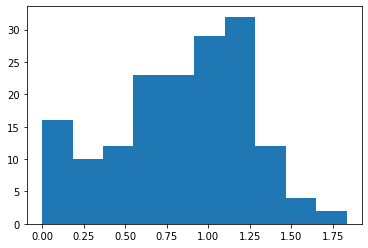

In [ ]:
plt.hist(stackpersess)

##Clean avg point gain in avgpt


In [ ]:
avgdf = pd.read_csv(os.path.join(datapath,'average_point_gain.csv'))

In [ ]:
avgdf

,Unnamed: 0,playerID,averageProgress
0,1,6427001,13
1,2,6427002,15
2,3,6427004,0
3,4,6427005,9
4,5,6427006,15
...,...,...,...
161,162,6626006,3
162,163,6626007,8
163,164,7540835,6
164,165,65670031,36


In [ ]:
avgdf = avgdf[avgdf["playerID"]!=6427002]
avgdf = avgdf[avgdf["playerID"]!=6427005]
avgdf = avgdf[avgdf["playerID"]!=6427007]

In [ ]:
avgpt = avgdf[["averageProgress"]].to_numpy()

In [ ]:
avgpt 

array([13,  0, 15, 14,  4, 21, 20, 10, 15, 11, 13,  9, 12, 17, 16, 13, 16,
       10,  7, 18,  6, 12,  6,  7, 13,  6, 21, 12, 13, 14, 14,  7, 19, 13,
        8, 13, 15,  7,  8, 17, 17, 14, 12,  5, 12,  8,  4, 11,  0, 20, 14,
       15, 21, 15, 11,  9, 18, 13,  5, 14,  8, 14,  4, 20,  6, 13, 12, 14,
        4, 14, 16,  0, 12, 10, 14,  6, 16,  0,  8, 12, 14, 12, 13,  6, 15,
        0, 12, 13, 13,  2,  8,  8, 12, 14, 18, 15, 25, 18, 11, 11, 16, 14,
       18, 18, 10, 12, 13,  7, 21,  5, 15, 15, 18,  6,  6,  9,  4,  8, 10,
       11, 13, 19,  5, 18, 24, 15,  8,  8, 13, 12, 16, 12, 16,  9, 14,  6,
       14, 13, 14, 25, 15, 10, 18, 11,  6, 12, 10,  0, 18, 19, 25, 17, 21,
       37,  4,  5, 18, 13,  3,  8,  6, 36, 46])

##clean event time in event

In [ ]:
event df = pd.read_csv('')

In [ ]:
eventdf = edf[edf['event_time_dbl'].notna()]
eventdf = eventdf.drop_duplicates(subset='player_id', keep="last")

In [ ]:
event = eventdf[["event_time_dbl"]].to_numpy()

##combine into a final df


In [3]:
pd.DataFrame()

NameError: ignored

In [ ]:
avgpt = avgpt.reshape((1,163)).flatten()
playerid = playerid.reshape((1,163)).flatten()
stackpersess = numpy.array(stackpersess).reshape((1,163)).flatten()
id = id.reshape((1,163)).flatten()
age = age.reshape((1,163)).flatten()
gender = gender.reshape((1,163)).flatten()
#event = event.reshape((1,163)).flatten()
elasped = elasped.reshape((1,163)).flatten()

In [ ]:
finaldf = pd.DataFrame(data = {'avatarid':id,'avatarage':age,'avatargender':gender,'playtime':elasped,'avgpt':avgpt,'stackpersess':stackpersess}, index=playerid)

In [ ]:
finaldf

,avatarid,avatarage,avatargender,playtime,avgpt,stackpersess
6427001,2.0,13.0,Male,37718,13,1.000000
6427004,0.0,13.0,Female,30307,0,1.222222
6427006,0.0,13.0,Female,31927,15,1.100000
6427008,0.0,13.0,Male,20875,14,0.714286
6427010,0.0,13.0,Male,4380,4,0.000000
...,...,...,...,...,...,...
6626006,1.0,13.0,Male,40352,3,0.727273
6626007,1.0,11.0,Male,34933,8,0.500000
7540835,2.0,14.0,Female,535,6,0.000000
65670031,0.0,12.0,Female,11100,36,1.222222


In [ ]:
finaldf.to_csv('clean1.csv')

##reassignment of elasped time

Cleaning of the elasped time outliers are done in R, exported as a two-column csv and combined with the other variables

In [ ]:
retimedf = pd.read_csv('/content/drive/MyDrive/Datafest/total_elapsed_time.csv')

In [ ]:
retimedf = retimedf[retimedf["playerID"]!=6427002]
retimedf = retimedf[retimedf["playerID"]!=6427005]
retimedf = retimedf[retimedf["playerID"]!=6427007]

In [ ]:
elasped = retimedf['elapsed_time'].to_numpy()

In [ ]:
elasped

array([37718, 30307, 31927, 20875,  4380, 23092, 26126, 30120, 10878,
       13329, 33698, 39967, 44208, 27810, 36963, 37713, 29485, 44158,
       31795, 30187, 36504, 34689, 12526, 36511, 23659,  3922, 32741,
       27976, 37927, 33534, 30227, 32378, 12849, 39875, 32877, 41036,
       28688, 13852, 12403, 26054, 29226, 30620, 24908, 30852, 27014,
       26167,  4259, 18475, 27078, 26675, 37318, 34418, 26449, 31354,
       44373, 46891, 30452, 14944, 10098, 36400, 29712, 35016, 39605,
       33736,  8956, 38809, 35427, 31991,  6295, 32302, 24836, 20504,
       38031, 36069, 28978,  2887, 26483, 30770,  9015, 30228, 22491,
       31364, 36612, 14612, 33195, 32221, 36571, 29527, 27916, 32127,
       40876, 41104, 41724, 39696, 23616, 45403, 19011, 35088, 20959,
       35572, 36803, 39786, 15289, 25593, 35664, 40744, 40668, 37949,
       33260, 13041, 22086, 34224, 33228, 37799, 47793, 29673, 39171,
       30943, 16043, 40818, 37891, 22389, 15636, 21990, 23017, 24859,
        8954, 12483,

##K Mean clustering with sklearn


In [9]:
finaldf = pd.read_csv('/content/clean1.csv')
#df = finaldf[["playtime", "avgpt","stackpersess"]]
df = finaldf[["avgpt","playtime"]]

In [ ]:
finaldf

,Unnamed: 0,avatarid,avatarage,avatargender,playtime,avgpt,stackpersess
0,6427001,2.0,13.0,Male,37718,13,1.000000
1,6427004,0.0,13.0,Female,30307,0,1.222222
2,6427006,0.0,13.0,Female,31927,15,1.100000
3,6427008,0.0,13.0,Male,20875,14,0.714286
4,6427010,0.0,13.0,Male,4380,4,0.000000
...,...,...,...,...,...,...,...
158,6626006,1.0,13.0,Male,40352,3,0.727273
159,6626007,1.0,11.0,Male,34933,8,0.500000
160,7540835,2.0,14.0,Female,535,6,0.000000
161,65670031,0.0,12.0,Female,11100,36,1.222222


In [ ]:
df.shape

(163, 2)

Elbow method to decide cluster number

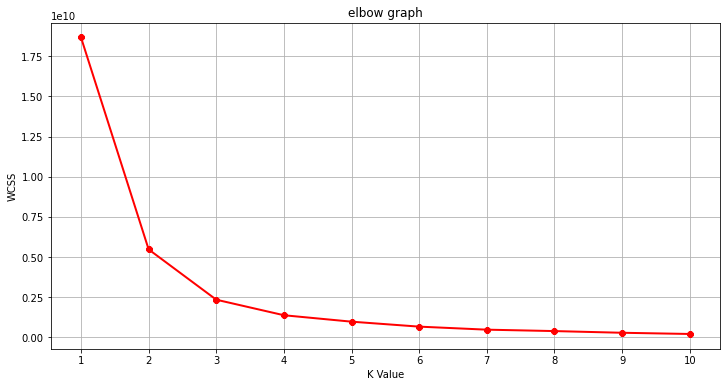

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title("elbow graph")
plt.show()

2d clustering based on playtime and average points gained per session

In [ ]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)

[1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0]


In [ ]:
#filter rows of original data
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label = df[label == 1]

In [ ]:
filtered_label0

,avgpt,playtime
3,14,20875
4,4,4380
5,21,23092
8,15,10878
9,11,13329
22,6,12526
24,13,23659
25,6,3922
32,19,12849
37,7,13852


In [ ]:
cmap = numpy.matrix('1,2,3;4,6,7')

In [ ]:
finaldf[label==0]

,Unnamed: 0,avatarid,avatarage,avatargender,playtime,avgpt,stackpersess
3,6427008,0.0,13.0,Male,20875,14,0.714286
4,6427010,0.0,13.0,Male,4380,4,0.000000
5,6427011,0.0,14.0,Male,23092,21,1.571429
8,6427014,0.0,14.0,Female,10878,15,1.000000
9,6427015,1.0,14.0,Male,13329,11,1.000000
22,6427029,0.0,11.0,Female,12526,6,0.333333
24,6427031,0.0,11.0,Male,23659,13,1.250000
25,6427032,0.0,11.0,Male,3922,6,0.000000
32,6427039,0.0,12.0,Male,12849,19,1.200000
37,6429001,1.0,12.0,Male,13852,7,0.250000


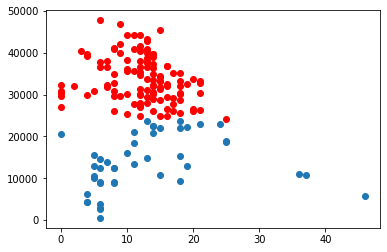

In [ ]:
#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'red')
plt.show()

In [ ]:
cmap, norm = mcolors.from_levels_and_colors([0, 1, 2], ['red', 'green', 'blue'])

##3d clustering result

In [10]:
df1 = finaldf[["avgpt","playtime","stackpersess"]]

##normalized data

In [11]:
dfstd = (df1-df1.mean())/df1.std()

In [12]:
dfstd

,avgpt,playtime,stackpersess
0,0.079646,0.873017,0.412462
1,-1.905877,0.182579,0.954516
2,0.385111,0.333505,0.656386
3,0.232378,-0.696142,-0.284465
4,-1.294947,-2.232880,-2.026783
...,...,...,...
158,-1.447680,1.118411,-0.252787
159,-0.684017,0.613556,-0.807161
160,-0.989482,-2.591096,-2.026783
161,3.592494,-1.606819,0.954516


In [13]:
kmstd = KMeans(n_clusters=3)
clusters = kmstd.fit_predict(dfstd.iloc[:,1:])
dfstd["label"] = clusters

##visualization with axes

color based on labels (clustering results, cluster# = 3)

No handles with labels found to put in legend.


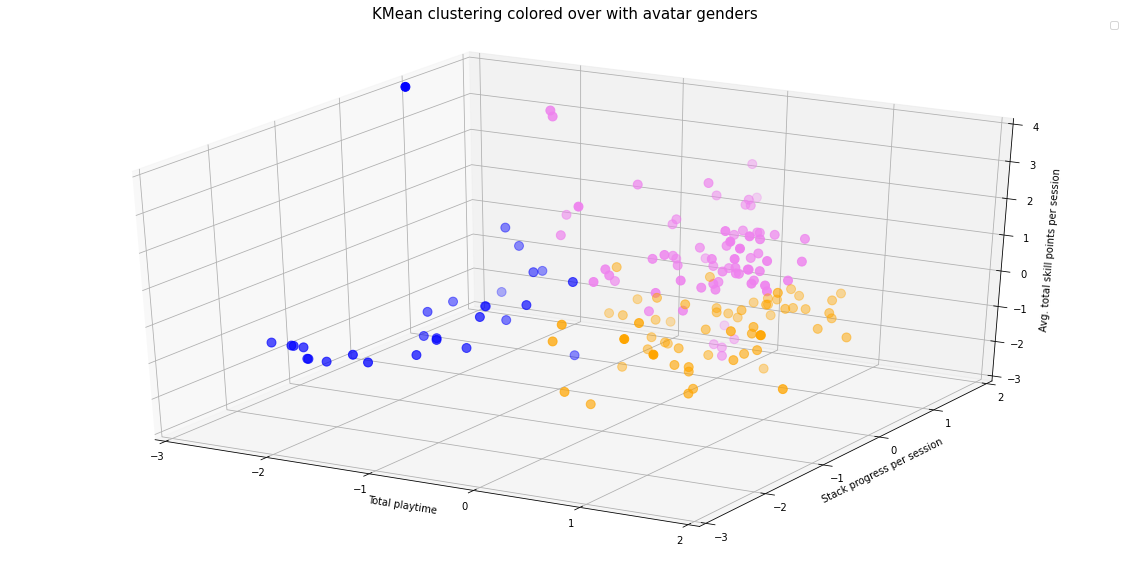

In [14]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfstd["playtime"][dfstd.label == 0], dfstd["stackpersess"][dfstd.label == 0],dfstd["avgpt"][dfstd.label == 0], c='violet', s=80)
ax.scatter(dfstd["playtime"][dfstd.label == 1], dfstd["stackpersess"][dfstd.label == 1],dfstd["avgpt"][dfstd.label == 1],  c='blue', s=80)
ax.scatter(dfstd["playtime"][dfstd.label == 2],  dfstd["stackpersess"][dfstd.label == 2],dfstd["avgpt"][dfstd.label == 2],c='orange', s=80)
#ax.scatter(dfstd["playtime"],  dfstd["stackpersess"],dfstd["avgpt"],c=colors, s=80)
ax.set_zlim3d(-3,4)
ax.set_ylim3d(-3,2)
ax.set_xlim3d(-3,2)
#ax.view_init(0, 150)
plt.xlabel("Total playtime")
plt.ylabel("Stack progress per session")
ax.set_zlabel("Avg. total skill points per session")
plt.title("KMean clustering colored over with avatar genders\n\n", size = 15)
ax.legend()
plt.show()

color over based on avatar types

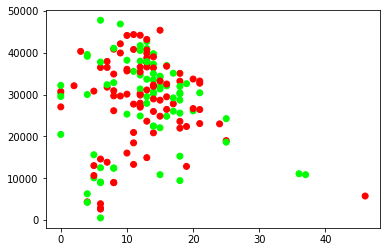

In [17]:
colors = []
for i in range(len(finaldf)):
    if finaldf.at[i, "avatargender"] == "Male":
        colors.append([1, 0, 0])
    elif finaldf.at[i, "avatargender"] == "Female":
        colors.append([0, 1, 0])
    #elif finaldf.at[i, "avatarid"] == 2:
        #colors.append([0, 0, 1])
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=colors)
#plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1])
plt.show()

No handles with labels found to put in legend.


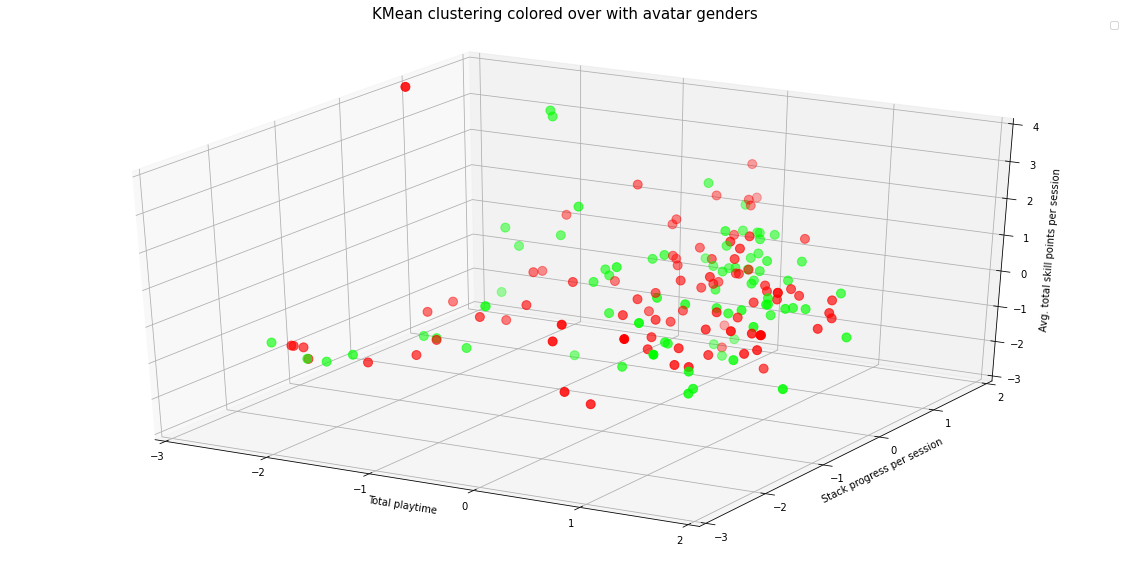

In [18]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(dfstd["playtime"][dfstd.label == 0], dfstd["stackpersess"][dfstd.label == 0],dfstd["avgpt"][dfstd.label == 0], c='violet', s=80)
#ax.scatter(dfstd["playtime"][dfstd.label == 1], dfstd["stackpersess"][dfstd.label == 1],dfstd["avgpt"][dfstd.label == 1],  c='blue', s=80)
#ax.scatter(dfstd["playtime"][dfstd.label == 2],  dfstd["stackpersess"][dfstd.label == 2],dfstd["avgpt"][dfstd.label == 2],c='orange', s=80)
ax.scatter(dfstd["playtime"],  dfstd["stackpersess"],dfstd["avgpt"],c=colors, s=80)
ax.set_zlim3d(-3,4)
ax.set_ylim3d(-3,2)
ax.set_xlim3d(-3,2)
#ax.view_init(0, 150)
plt.xlabel("Total playtime")
plt.ylabel("Stack progress per session")
ax.set_zlabel("Avg. total skill points per session")
plt.title("KMean clustering colored over with avatar genders\n\n", size = 15)
ax.legend()
plt.show()

In [19]:
sizel = []
for i in range(163):
  sizel.append(2)

##interactive display with plotly

In [26]:
labellist = dfstd["label"].to_list()

In [27]:
colorlist = []
for i in labellist:
    if i == 2:
        colorlist.append("orange")
    elif i == 1:
        colorlist.append("violet")
    else:
        colorlist.append("red")


In [32]:
dfstd["color"]=colorlist

In [33]:
dfstd

,avgpt,playtime,stackpersess,label,color
0,0.079646,0.873017,0.412462,2,orange
1,-1.905877,0.182579,0.954516,0,red
2,0.385111,0.333505,0.656386,0,red
3,0.232378,-0.696142,-0.284465,1,violet
4,-1.294947,-2.232880,-2.026783,1,violet
...,...,...,...,...,...
158,-1.447680,1.118411,-0.252787,2,orange
159,-0.684017,0.613556,-0.807161,2,orange
160,-0.989482,-2.591096,-2.026783,1,violet
161,3.592494,-1.606819,0.954516,0,red


In [34]:
fig = px.scatter_3d(dfstd, x='avgpt', y='stackpersess', z='playtime',color="color",\
                    title = "K-Means clustering to characterize student player groups",\
                    labels = {"avgpt":"Average total skill pts. gained per session","stackpersess":"Stack per session","playtime":"Total Playtime"},\
                    size = sizel,\
                    #color = {"avgpt":"violet","stackpersess":"pink","playtime":"orange"},\
                    color_discrete_map = {"avgpt":"violet","stackpersess":"red","playtime":"orange"},\
                    opacity = 0.8
                  )

fig.show()

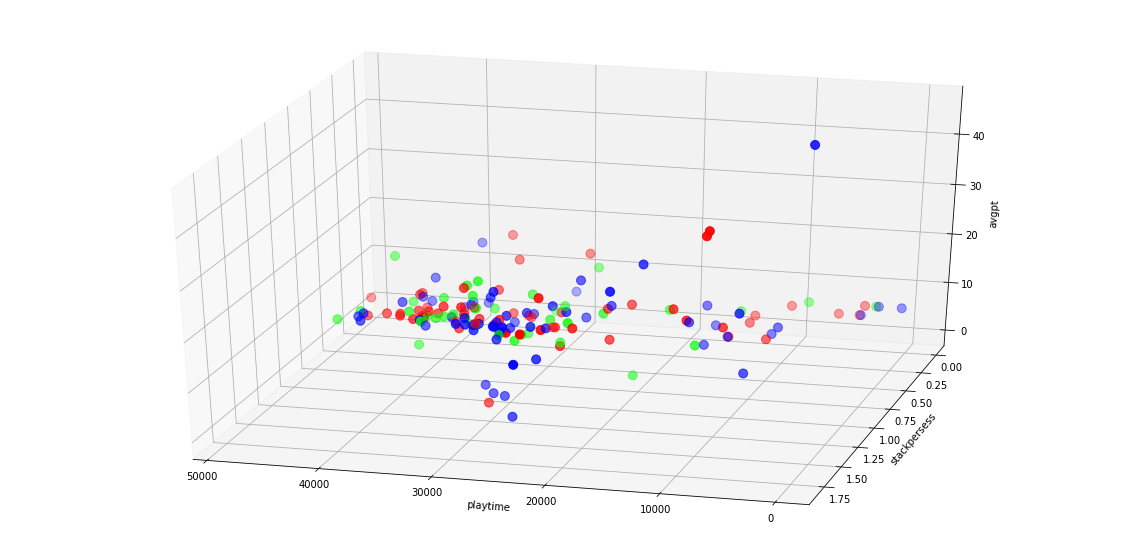

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df1["playtime"][df1.label == 0], df1["stackpersess"][df1.label == 0],df1["avgpt"][df1.label == 0], c='blue', s=80)
#ax.scatter(df1["playtime"][df1.label == 1], df1["stackpersess"][df1.label == 1],df1["avgpt"][df1.label == 1],  c='red', s=80)
#ax.scatter(df1["playtime"][df1.label == 2],  df1["stackpersess"][df1.label == 2],df1["avgpt"][df1.label == 2],c='green', s=80)
ax.scatter(df1["playtime"],  df1["stackpersess"],df1["avgpt"],c=colors, s=80)

ax.view_init(30, 105)
plt.xlabel("playtime")
plt.ylabel("stackpersess")
ax.set_zlabel("avgpt")
plt.show()

In [ ]:
print(kmean.cluster_centers_)

[[ 1.22881356e+01  3.39026864e+04  1.00000000e+00]
 [ 1.29777778e+01  1.37796000e+04 -1.11022302e-16]]


##trivial viewing of by-avatar-group distributions

In [ ]:
finaldf[["avatarid"]]

In [ ]:
final.df

[30307, 31927, 20875, 4380, 23092, 26126, 10878, 33698, 39967, 27810, 36963, 37713, 44158, 31795, 12526, 23659, 3922, 33534, 12849, 39875, 32877, 28688, 12403, 29226, 30620, 27014, 36400, 38809, 6295, 32302, 36069, 9015, 40876, 41724, 20959, 35572, 36803, 39786, 15289, 40744, 33260, 13041, 22086, 34224, 37799, 47793, 39171, 30943, 37891, 21990, 23017, 24859, 40558, 32628, 24263, 35124, 10867, 30027, 10664, 11100]
[13329, 44208, 30187, 36504, 34689, 32741, 27976, 37927, 30227, 13852, 26167, 18475, 46891, 29712, 35016, 33736, 20504, 38031, 2887, 30228, 22491, 36612, 33195, 36571, 27916, 32127, 45403, 35088, 35664, 33228, 29673, 22389, 27294, 42160, 39037, 9107, 27743, 40352, 34933]
[37718, 30120, 29485, 36511, 32378, 41036, 26054, 24908, 30852, 4259, 27078, 26675, 37318, 34418, 26449, 31354, 44373, 30452, 14944, 10098, 39605, 8956, 35427, 31991, 24836, 28978, 26483, 30770, 31364, 14612, 32221, 29527, 41104, 39696, 23616, 19011, 25593, 40668, 37949, 16043, 40818, 15636, 8954, 12483, 42713

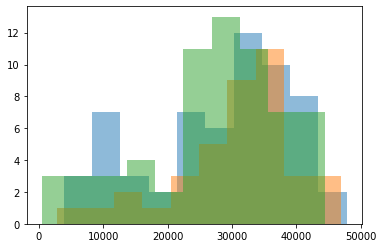

In [ ]:
for i in [0,1,2]:
    tdf = finaldf[finaldf["avatarid"] == i]
    print(tdf["playtime"].tolist())
    plt.hist(tdf["playtime"].tolist(),alpha = 0.5)

[0, 15, 14, 4, 21, 20, 15, 13, 9, 17, 16, 13, 10, 7, 6, 13, 6, 14, 19, 13, 8, 15, 8, 17, 14, 12, 14, 13, 4, 14, 10, 8, 8, 12, 11, 11, 16, 14, 18, 12, 21, 5, 15, 15, 6, 6, 4, 8, 13, 18, 24, 15, 12, 19, 25, 17, 37, 4, 5, 36]
[11, 12, 18, 6, 12, 21, 12, 13, 14, 7, 8, 11, 9, 8, 14, 20, 0, 12, 6, 12, 14, 13, 15, 12, 13, 2, 15, 18, 10, 18, 9, 19, 12, 9, 14, 6, 11, 3, 8]
[13, 10, 16, 7, 7, 13, 17, 12, 5, 4, 0, 20, 14, 15, 21, 15, 11, 18, 13, 5, 4, 6, 12, 14, 16, 14, 16, 0, 12, 6, 0, 13, 8, 14, 18, 25, 18, 13, 7, 10, 11, 5, 8, 8, 13, 16, 16, 14, 13, 14, 25, 15, 10, 18, 6, 12, 10, 0, 18, 21, 18, 13, 6, 46]


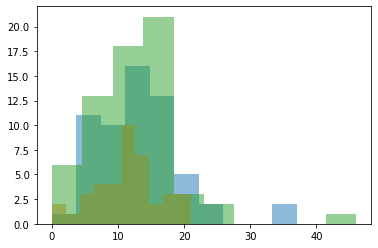

In [ ]:
for i in [0,1,2]:
    tdf = finaldf[finaldf["avatarid"] == i]
    print(tdf["avgpt"].tolist())
    plt.hist(tdf["avgpt"].tolist(),alpha = 0.5)

[1.2222222222222223, 1.1, 0.7142857142857143, 0.0, 1.5714285714285714, 1.5714285714285714, 1.0, 1.1111111111111112, 0.7272727272727273, 1.375, 1.2222222222222223, 1.0, 0.8333333333333334, 0.5, 0.3333333333333333, 1.25, 0.0, 0.6363636363636364, 1.2, 1.0, 0.5454545454545454, 0.125, 0.6666666666666666, 1.2222222222222223, 1.1, 0.75, 1.0, 0.9166666666666666, 0.0, 1.1, 0.8333333333333334, 0.6666666666666666, 0.5454545454545454, 0.9166666666666666, 1.0, 0.8, 0.0, 0.7692307692307693, 1.0, 0.6153846153846154, 1.1, 0.16666666666666666, 0.8571428571428571, 0.2727272727272727, 0.375, 0.3333333333333333, 0.3125, 0.5833333333333334, 0.9166666666666666, 1.3333333333333333, 1.8333333333333333, 1.1428571428571428, 0.9090909090909091, 1.2222222222222223, 1.4285714285714286, 1.1, 1.2222222222222223, 0.4444444444444444, 0.0, 1.2222222222222223]
[1.0, 0.9090909090909091, 1.375, 0.6, 0.7777777777777778, 1.0, 0.1111111111111111, 0.7272727272727273, 0.6666666666666666, 0.25, 0.8888888888888888, 0.55555555555

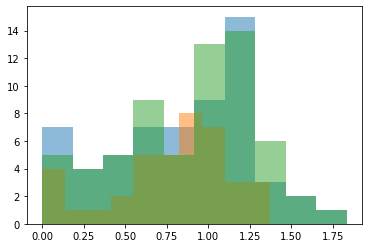

In [ ]:
for i in [0,1,2]:
    tdf = finaldf[finaldf["avatarid"] == i]
    print(tdf["stackpersess"].tolist())
    plt.hist(tdf["stackpersess"].tolist(),alpha = 0.5)

[13, 14, 4, 21, 10, 11, 9, 12, 17, 13, 16, 10, 7, 6, 7, 13, 6, 21, 12, 19, 13, 15, 7, 5, 12, 8, 11, 0, 20, 21, 11, 13, 14, 8, 20, 13, 12, 14, 14, 10, 14, 6, 16, 0, 8, 12, 13, 6, 12, 2, 8, 18, 15, 25, 18, 11, 16, 10, 13, 7, 21, 5, 18, 9, 8, 10, 11, 19, 18, 24, 15, 8, 12, 16, 9, 14, 13, 14, 15, 11, 6, 12, 5, 13, 3, 8, 46]
[0, 15, 20, 15, 13, 16, 18, 12, 6, 13, 14, 14, 7, 8, 13, 8, 17, 17, 14, 12, 4, 14, 15, 15, 9, 18, 5, 14, 4, 6, 4, 16, 0, 12, 14, 12, 15, 0, 13, 13, 8, 12, 14, 11, 14, 18, 18, 12, 15, 15, 6, 6, 4, 13, 5, 8, 13, 12, 16, 6, 14, 25, 10, 18, 10, 0, 18, 19, 25, 17, 21, 37, 4, 18, 6, 36]


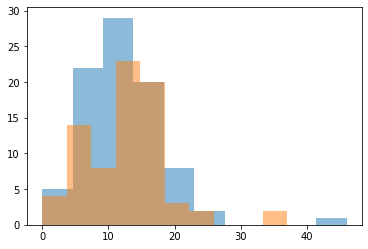

In [ ]:
for i in ['Male','Female']:
    tdf = finaldf[finaldf["avatargender"] == i]
    print(tdf["avgpt"].tolist())
    plt.hist(tdf["avgpt"].tolist(),alpha = 0.5)

[37718, 20875, 4380, 23092, 30120, 13329, 39967, 44208, 27810, 37713, 29485, 44158, 31795, 36504, 36511, 23659, 3922, 32741, 27976, 12849, 39875, 28688, 13852, 30852, 27014, 26167, 18475, 27078, 26675, 26449, 44373, 14944, 36400, 29712, 33736, 38809, 35427, 31991, 32302, 36069, 28978, 2887, 26483, 30770, 9015, 30228, 36612, 14612, 36571, 32127, 40876, 23616, 45403, 19011, 35088, 20959, 36803, 35664, 40668, 37949, 33260, 13041, 33228, 29673, 30943, 16043, 40818, 22389, 21990, 23017, 24859, 8954, 27294, 32547, 42160, 39037, 31130, 25987, 33281, 27743, 2644, 29906, 10664, 43205, 40352, 34933, 5767]
[30307, 31927, 26126, 10878, 33698, 36963, 30187, 34689, 12526, 37927, 33534, 30227, 32378, 32877, 41036, 12403, 26054, 29226, 30620, 24908, 4259, 37318, 34418, 31354, 46891, 30452, 10098, 35016, 39605, 8956, 6295, 24836, 20504, 38031, 22491, 31364, 33195, 32221, 29527, 27916, 41104, 41724, 39696, 35572, 39786, 15289, 25593, 40744, 22086, 34224, 37799, 47793, 39171, 37891, 15636, 12483, 42713, 

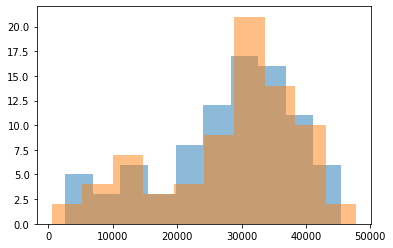

In [ ]:
for i in ['Male','Female']:
    tdf = finaldf[finaldf["avatargender"] == i]
    print(tdf["playtime"].tolist())
    plt.hist(tdf["playtime"].tolist(),alpha = 0.5)

[1.0, 0.7142857142857143, 0.0, 1.5714285714285714, 0.6666666666666666, 1.0, 0.7272727272727273, 0.9090909090909091, 1.375, 1.0, 1.1, 0.8333333333333334, 0.5, 0.6, 0.36363636363636365, 1.25, 0.0, 1.0, 0.1111111111111111, 1.2, 1.0, 0.125, 0.25, 0.0, 0.75, 0.8888888888888888, 0.5555555555555556, 1.375, 1.5714285714285714, 1.5714285714285714, 0.9166666666666666, 0.8333333333333334, 1.0, 0.8, 1.0, 0.9166666666666666, 0.7272727272727273, 1.1, 1.1, 0.8333333333333334, 0.9166666666666666, 0.0, 1.2222222222222223, 1.1, 0.6666666666666666, 1.1, 1.0, 0.6666666666666666, 0.9090909090909091, 0.09090909090909091, 0.5454545454545454, 1.8333333333333333, 0.3333333333333333, 1.2857142857142858, 1.375, 1.0, 0.0, 0.6363636363636364, 0.46153846153846156, 0.36363636363636365, 1.1, 0.16666666666666666, 1.0, 0.8888888888888888, 0.5833333333333334, 0.4, 0.6, 1.3333333333333333, 1.3333333333333333, 1.8333333333333333, 1.1428571428571428, 0.5, 0.8571428571428571, 0.875, 0.5454545454545454, 1.0, 1.0, 1.1, 1.1, 0

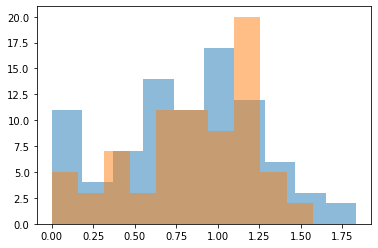

In [ ]:
for i in ['Male','Female']:
    tdf = finaldf[finaldf["avatargender"] == i]
    print(tdf["stackpersess"].tolist())
    plt.hist(tdf["stackpersess"].tolist(),alpha = 0.5)

[20875, 4380, 23092, 39967, 27810, 37713, 44158, 31795, 23659, 3922, 12849, 39875, 28688, 27014, 36400, 38809, 32302, 36069, 9015, 40876, 20959, 36803, 33260, 13041, 30943, 21990, 23017, 24859, 10664]
[13329, 44208, 36504, 32741, 27976, 13852, 26167, 18475, 29712, 33736, 2887, 30228, 36612, 36571, 32127, 45403, 35088, 35664, 33228, 29673, 22389, 27294, 42160, 39037, 27743, 40352, 34933]
[37718, 30120, 29485, 36511, 30852, 27078, 26675, 26449, 44373, 14944, 35427, 31991, 28978, 26483, 30770, 14612, 23616, 19011, 40668, 37949, 16043, 40818, 8954, 32547, 31130, 25987, 33281, 2644, 29906, 43205, 5767]
[30307, 31927, 26126, 10878, 33698, 36963, 12526, 33534, 32877, 12403, 29226, 30620, 6295, 41724, 35572, 39786, 15289, 40744, 22086, 34224, 37799, 47793, 39171, 37891, 40558, 32628, 24263, 35124, 10867, 30027, 11100]
[30187, 34689, 37927, 30227, 46891, 35016, 20504, 38031, 22491, 33195, 27916, 9107]
[32378, 41036, 26054, 24908, 4259, 37318, 34418, 31354, 30452, 10098, 39605, 8956, 24836, 3136

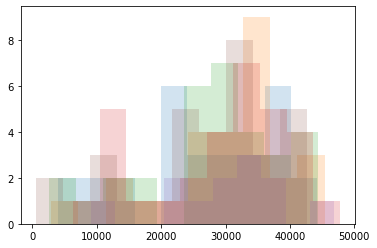

In [ ]:
for i in ['Male','Female']:
  for j in [0,1,2]:
      tdf = finaldf[finaldf["avatargender"] == i]
      tdf = tdf[tdf["avatarid"]==j]
      print(tdf["playtime"].tolist())
      plt.hist(tdf["playtime"].tolist(),alpha = 0.2)

In [ ]:
skilldf = pd.read_csv('/content/skillPoints (1).csv')

In [ ]:
skilldf = skilldf[skilldf["listID[j]"]!=6427002]
skilldf = skilldf[skilldf["listID[j]"]!=6427005]
skilldf = skilldf[skilldf["listID[j]"]!=6427007]

In [ ]:
skilldf = skilldf.rename({'listID[j]':'playerid'},axis=1)

In [ ]:
skilldf

,Unnamed: 0,playerid,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me
0,26,6427001,2.727273,2.727273,2.636364,2.363636,2.727273
2,27,6427004,3.222222,3.222222,3.222222,3.111111,3.333333
4,23,6427006,2.900000,3.000000,2.700000,3.000000,3.000000
6,29,6427008,2.000000,2.333333,2.666667,2.333333,4.500000
7,7,6427010,0.000000,0.000000,0.500000,0.000000,3.000000
...,...,...,...,...,...,...,...
161,471,6626006,0.545455,0.545455,0.545455,0.636364,1.090909
162,342,6626007,1.363636,1.181818,1.363636,1.636364,2.454545
163,110,7540835,0.000000,0.000000,0.000000,0.000000,6.000000
164,151,65670031,6.500000,7.500000,6.750000,7.500000,7.500000


In [ ]:
skilldf.to_csv('/content/skillPoints.csv')

In [ ]:
finaldf = finaldf.rename({'Unnamed: 0':'playerid'},axis=1)

In [ ]:
mergedf = pd.merge(skilldf,finaldf,on="playerid")

In [ ]:
mergedf

,Unnamed: 0,playerid,skill_level_know,skill_level_priority,skill_level_people,skill_level_refusal,skill_level_me,avatarid,avatarage,avatargender,playtime,avgpt,stackpersess
0,26,6427001,2.727273,2.727273,2.636364,2.363636,2.727273,2.0,13.0,Male,37718,13,1.000000
1,27,6427004,3.222222,3.222222,3.222222,3.111111,3.333333,0.0,13.0,Female,30307,0,1.222222
2,23,6427006,2.900000,3.000000,2.700000,3.000000,3.000000,0.0,13.0,Female,31927,15,1.100000
3,29,6427008,2.000000,2.333333,2.666667,2.333333,4.500000,0.0,13.0,Male,20875,14,0.714286
4,7,6427010,0.000000,0.000000,0.500000,0.000000,3.000000,0.0,13.0,Male,4380,4,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,471,6626006,0.545455,0.545455,0.545455,0.636364,1.090909,1.0,13.0,Male,40352,3,0.727273
159,342,6626007,1.363636,1.181818,1.363636,1.636364,2.454545,1.0,11.0,Male,34933,8,0.500000
160,110,7540835,0.000000,0.000000,0.000000,0.000000,6.000000,2.0,14.0,Female,535,6,0.000000
161,151,65670031,6.500000,7.500000,6.750000,7.500000,7.500000,0.0,12.0,Female,11100,36,1.222222


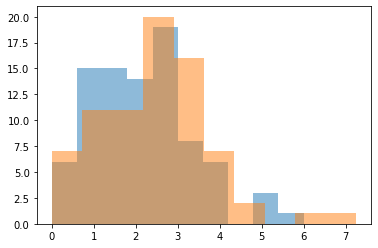

In [ ]:
for i in ["Male","Female"]:
      tdf = mergedf[mergedf["avatargender"] == i]
      #tdf = tdf[tdf["avatarid"]==j]
      plt.hist(tdf["skill_level_know"].tolist(),alpha = 0.5)